# XGB Model

In [29]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import scikitplot as skplt
from xgboost import plot_tree
import multiprocessing
from scikitplot.plotters import plot_feature_importances

In [32]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [33]:
def evaluate_model (model, y_pred, y_probs, visualize = True, tuned = False):
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score: ', accuracy)

    print(classification_report(y_test, y_pred))

    if visualize:
        plot_tree(model)

    skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    skplt.metrics.plot_roc(y_test, y_probs)
    skplt.metrics.plot_precision_recall_curve(y_test, y_probs)

    if not tuned:
        plot_feature_importances(model, feature_names = X_test.columns)


## 1. Load train/test data from GitHub

In [34]:
X_train = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/X_train.csv?raw=true')
X_test = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/X_test.csv?raw=true')
y_train = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/y_train.csv?raw=true')
y_test = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/y_test.csv?raw=true')

In [35]:
X_test.shape, X_train.shape

((61, 17), (242, 17))

In [36]:
y_test.shape, y_train.shape

((61, 1), (242, 1))

## 2. Base XGBoost Model

In [37]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [38]:
y_pred = xgb_model.predict(X_test)
y_probs = xgb_model.predict_proba(X_test)

Accuracy Score:  0.8524590163934426
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_feature_importances is deprecated; This will be removed in v0.4.0. Please use scikitplot.estimators.plot_feature_importances instead.
  warnings.warn(msg, category=FutureWarning)


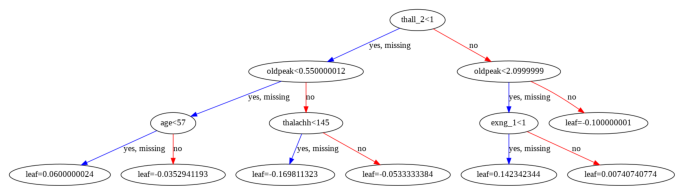

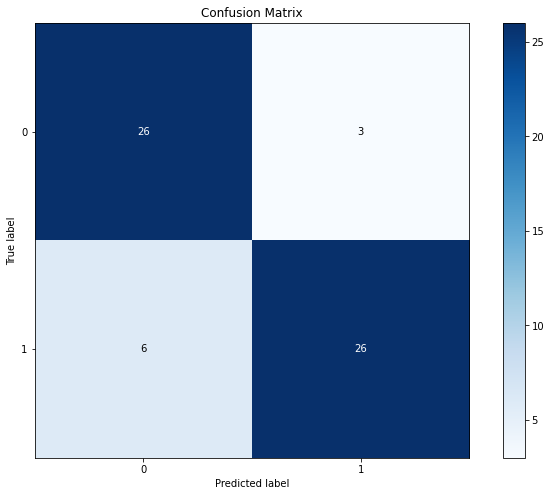

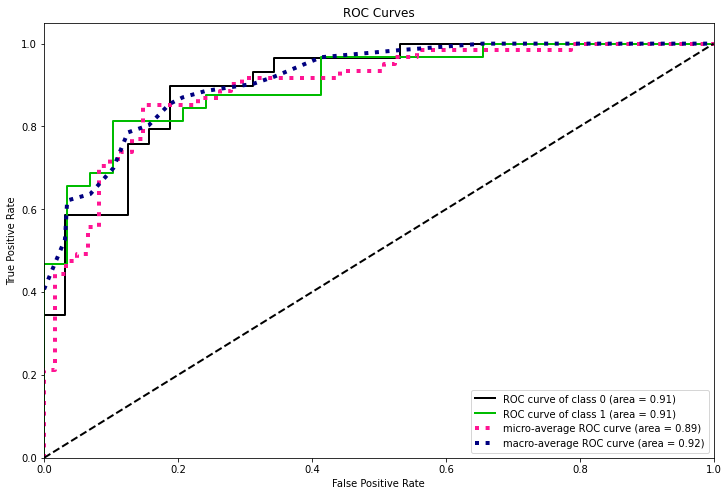

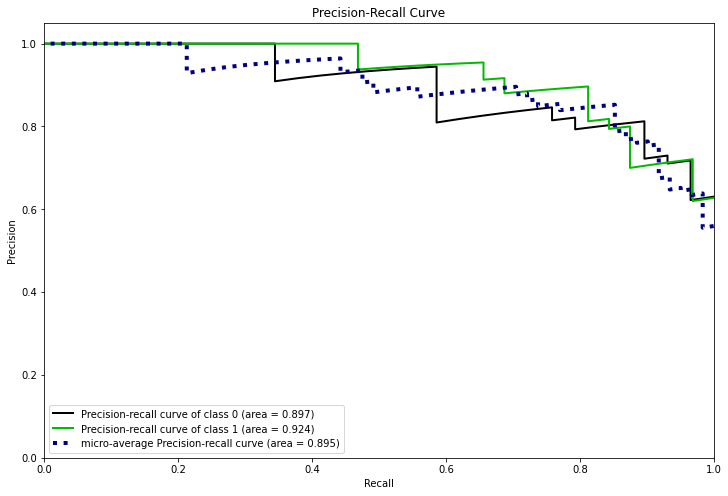

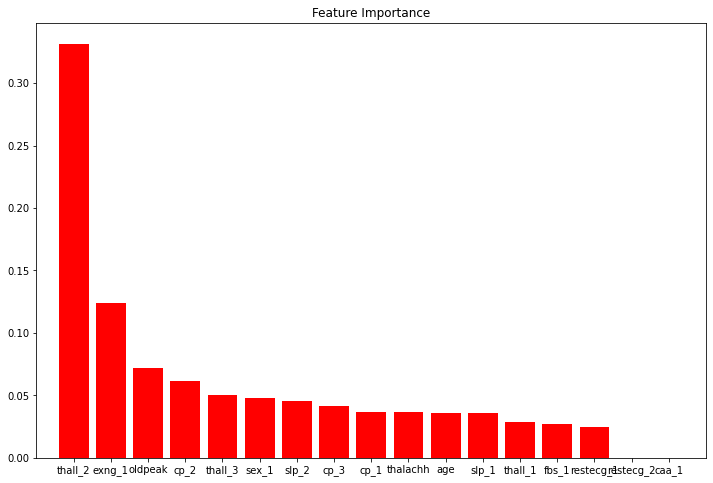

In [39]:
evaluate_model(xgb_model, y_pred, y_probs)

## 3. Parameter Tuning with ```GridSearchCV```

In [40]:
xgb_model = xgb.XGBClassifier(n_jobs = multiprocessing.cpu_count() // 2)

In [41]:
param_grid = {
    'booster': ['gbtree', 'gblinear', 'dart'],
    'max_depth': np.arange(0, 10, step = 1),
    'n_estimators': np.arange(100, 200, step = 10)
}

In [42]:
clf = GridSearchCV(xgb_model, param_grid, verbose = 2, n_jobs = 2)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
0.8221088435374149
{'booster': 'gbtree', 'max_depth': 1, 'n_estimators': 170}


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

Accuracy Score:  0.8524590163934426
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


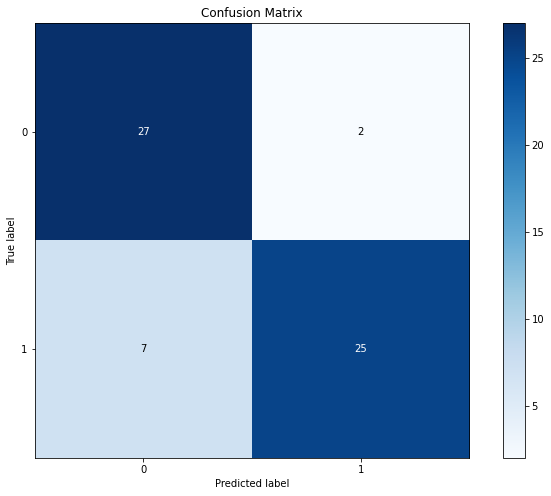

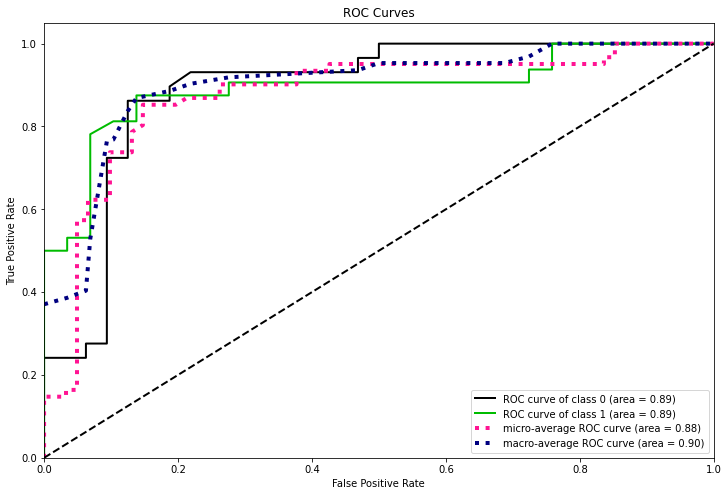

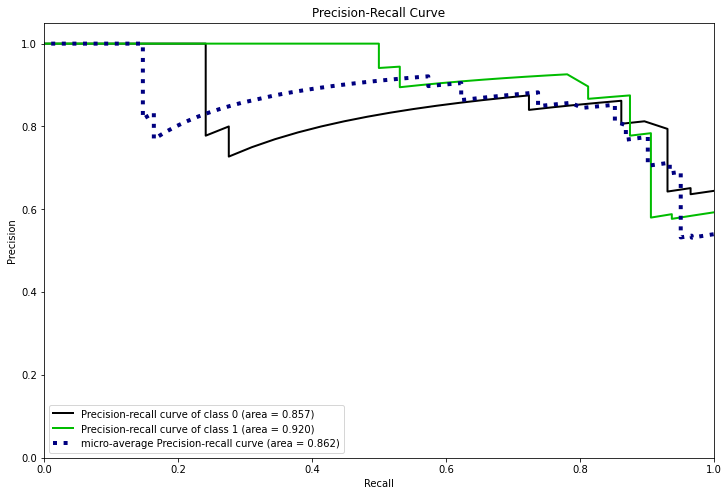

In [46]:
evaluate_model(clf, y_pred, y_probs, visualize = False, tuned = True)